In [1]:
import pandas as pd
import numpy as np
import os, math, json, time, datetime
#from pyspark.sql import SparkSession, functions, window
#from pyspark.sql.types import StringType
#from pyspark.sql.types import StructType
#from pyspark.conf import SparkConf
#from pyspark.sql import functions as func
#from pyspark.sql.window import Window
#from pyspark import SparkContext
#from pyspark import SparkConf,SparkContext,HiveContext
#from pyspark.sql import SQLContext
#from pyspark.sql import SparkSession
#from pyspark.sql import Row
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, make_scorer
import seaborn as sns


from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse

In [98]:
df = pd.read_csv('data.csv',sep=';')

In [3]:
df.head()

,Periode,Demand
0,31/01/2018,34890
1,28/02/2018,25830
2,31/03/2018,41054
3,30/04/2018,36838
4,31/05/2018,56808


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Periode  76 non-null     object
 1   Demand   76 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [99]:
df['Demand'] = df['Demand'].astype('float')
df['Periode'] = pd.to_datetime(df['Periode'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Periode  76 non-null     datetime64[ns]
 1   Demand   76 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


In [7]:
df.head()

,Periode,Demand
0,2018-01-31,34890.0
1,2018-02-28,25830.0
2,2018-03-31,41054.0
3,2018-04-30,36838.0
4,2018-05-31,56808.0


# ARIMA

In [50]:
#train_data =  df[(df['Periode'] < '2023-05-01')&(df['Periode'] >= '2021-05-01')]
train_data =  df[df['Periode'] < '2023-05-01']
test_data = df[df['Periode'] >= '2023-05-01']

In [51]:
train_data.index = train_data['Periode']
test_data.index = test_data['Periode']

train_data = train_data.drop(['Periode'], axis=1)
test_data = test_data.drop(['Periode'], axis=1)

In [52]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
 
# Load your time series data
# Assuming 'data' is a pandas Series or DataFrame with datetime index
# Replace 'data.csv' with your data file path if loading from file
# data = pd.read_csv('data.csv', index_col='Date', parse_dates=True)

 
# Define the range of values for SARIMA parameters
p_values = range(0, 5)  # AR order
d_values = range(0, 4)  # Differencing order
q_values = range(0, 5)  # MA order

#s = 12  # Seasonal period (e.g., 12 for monthly data)
 
best_aic = float("inf")
best_order = None
best_result = None
best_mae = float("inf")
 
# Grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train_data, order=(p, d, q))
                result = model.fit()
                # Make predictions
                forecast = result.forecast(steps=len(test_data))
                # Calculate MAE
                mae = mean_absolute_error(test_data, forecast)
                # Update best parameters if MAE is lower
                if mae < best_mae:
                    best_mae = mae
                    best_order = (p, d, q)
                    best_result = result
                
                #aic = result.aic
                #if aic < best_aic:
                    #best_aic = aic
                    #best_order = (p, d, q)
                    #best_result = result
            except:
                continue
 
#print("Best AIC:", best_aic)
print("Best Order:", best_order)
print("Best MAE:", best_mae)
 
# Retrieve coefficients, intercept, and standard errors for the best model
print("Coefficients:", best_result.params)
print("Intercept:", best_result.params[-1])
print("Standard Errors:", best_result.bse)
 
# Prediction function
def arima_prediction(params, intercept, past_values, past_errors):
    prediction = intercept
    for i in range(len(params)):
        if i < len(past_values):
            prediction += params[i] * past_values[i]
        if i < len(past_errors):
            prediction -= params[i] * past_errors[i]
    return prediction

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood op

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Best Order: (3, 1, 2)
Best MAE: 5321.209096894062
Coefficients: ar.L1     1.398698e+00
ar.L2    -1.691202e-01
ar.L3    -4.374872e-01
ma.L1    -1.833332e+00
ma.L2     9.579777e-01
sigma2    2.855785e+08
dtype: float64
Intercept: 285578520.1586852
Standard Errors: ar.L1     1.896612e-01
ar.L2     3.053507e-01
ar.L3     1.653970e-01
ma.L1     2.312067e-01
ma.L2     2.209128e-01
sigma2    2.042759e-09
dtype: float64


In [53]:
best_result.params

ar.L1     1.398698e+00
ar.L2    -1.691202e-01
ar.L3    -4.374872e-01
ma.L1    -1.833332e+00
ma.L2     9.579777e-01
sigma2    2.855785e+08
dtype: float64

In [ ]:
# Example: Predict next value
#last_observed_values = cek[-len(best_result.params):]
#last_observed_values = cek[-(p+d):]
#last_errors = best_result.resid[-len(best_result.params):]
#next_prediction = arima_prediction(best_result.params, best_result.params[-1], last_observed_values, last_errors)
#print("Next Prediction:", next_prediction)

#(3, 1, 2)

In [54]:
# ARIMA model fitting
order = (3, 1, 2) # Replace with appropriate SARIMA order
arima_model = ARIMA(train_data, order=order)
arima_result = arima_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: Use

In [55]:
test_data['prediction'] = arima_result.forecast(steps=len(test_data)).values
test_data.loc[test_data['prediction'] < 0, 'prediction']=0

In [56]:
test_data['abs_error'] = abs(test_data['prediction']- test_data['Demand'])
test_data['error'] = test_data['prediction']- test_data['Demand']

In [109]:
train_data['prediction'] = arima_result.forecast(steps=len(train_data)).values
train_data.loc[train_data['prediction'] < 0, 'prediction']=0

train_data['abs_error'] = abs(train_data['prediction']- train_data['Demand'])
train_data['error'] = train_data['prediction']- train_data['Demand']

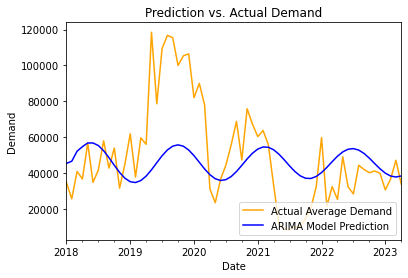

In [110]:
train_data['Demand'].plot(label='Actual Average Demand', color='orange')
train_data['prediction'].plot(label='ARIMA Model Prediction', color='blue')
plt.title("Prediction vs. Actual Demand")
plt.xlabel('Date')
plt.ylabel('Demand')

plt.legend(loc='lower right')

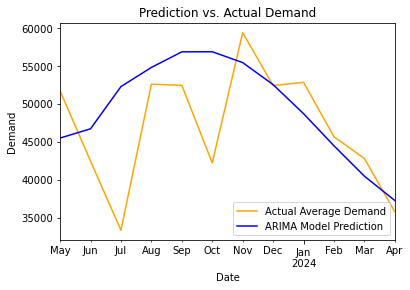

In [59]:
test_data['Demand'].plot(label='Actual Average Demand', color='orange')
test_data['prediction'].plot(label='ARIMA Model Prediction', color='blue')
plt.title("Prediction vs. Actual Demand")
plt.xlabel('Date')
plt.ylabel('Demand')

plt.legend(loc='lower right')

In [108]:
train_data['abs_error'].mean()

20606.90582567722

In [111]:
train_data[train_data.index>='2022-05-01']['abs_error'].mean()

8813.722425862587

In [60]:
test_data['abs_error'].mean()

5321.209096894062

In [61]:
(test_data['abs_error']/test_data['Demand']).mean()

0.12741409393788525

In [106]:
test_data['error'].sum()

28256.516195652068

In [ ]:
#Test Unseen Future Data w Dummy

In [101]:
dummy_data = pd.read_csv('dummy.csv',sep=';')

In [102]:
dummy_data.index = dummy_data['Periode']

dummy_data = dummy_data.drop(['Periode'], axis=1)


In [103]:
dummy_data['prediction'] = arima_result.forecast(steps=len(dummy_data)).values
dummy_data.loc[dummy_data['prediction'] < 0, 'prediction']=0

In [104]:
dummy_data

,Demand,prediction
Periode,,
31/05/2023,NaN,45520.797509
30/06/2023,NaN,46738.303025
31/07/2023,NaN,52299.203651
31/08/2023,NaN,54821.054161
30/09/2023,NaN,56875.257128
31/10/2023,NaN,56889.147482
30/11/2023,NaN,55457.891448
31/12/2023,NaN,52554.960327
31/01/2024,NaN,48730.614706


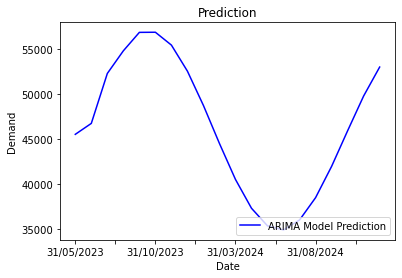

In [105]:
#dummy_data.plot(label='Actual Average Demand', color='orange')
dummy_data['prediction'].plot(label='ARIMA Model Prediction', color='blue')
plt.title("Prediction")
plt.xlabel('Date')
plt.ylabel('Demand')

plt.legend(loc='lower right')

In [107]:
train_data.to_csv('train.csv')
test_data.to_csv('test.csv')

In [ ]:
########################## FINISH ####################################################

In [68]:
c = test_data.copy()

In [69]:
c['Demand'] = np.nan

In [71]:
c['prediction'] = arima_result.forecast(steps=len(c['Demand'])).values

In [90]:
d ={'Periode': ['2025-12-31', '2026-01-31'],
                    'Demand': [np.nan, np.nan]}

In [91]:
c = pd.DataFrame(d)

In [92]:
c.index = c['Periode']

In [93]:
c['prediction'] = arima_result.forecast(steps=len(c['Demand'])).values

In [94]:
c

,Periode,Demand,prediction
Periode,,,
2025-12-31,2025-12-31,NaN,45520.797509
2026-01-31,2026-01-31,NaN,46738.303025


In [62]:
test_data

,Demand,prediction,abs_error,error
Periode,,,,
2023-05-31,51732.0,45520.797509,6211.202491,-6211.202491
2023-06-30,42493.0,46738.303025,4245.303025,4245.303025
2023-07-31,33368.0,52299.203651,18931.203651,18931.203651
2023-08-31,52612.0,54821.054161,2209.054161,2209.054161
2023-09-30,52467.0,56875.257128,4408.257128,4408.257128
2023-10-31,42235.0,56889.147482,14654.147482,14654.147482
2023-11-30,59404.0,55457.891448,3946.108552,-3946.108552
2023-12-31,52434.0,52554.960327,120.960327,120.960327
2024-01-31,52855.0,48730.614706,4124.385294,-4124.385294


In [46]:
test_data['error'].sum()

28256.516195652068

In [47]:
test_data

,Demand,prediction,abs_error,error
Periode,,,,
2023-05-31,51732.0,45520.797509,6211.202491,-6211.202491
2023-06-30,42493.0,46738.303025,4245.303025,4245.303025
2023-07-31,33368.0,52299.203651,18931.203651,18931.203651
2023-08-31,52612.0,54821.054161,2209.054161,2209.054161
2023-09-30,52467.0,56875.257128,4408.257128,4408.257128
2023-10-31,42235.0,56889.147482,14654.147482,14654.147482
2023-11-30,59404.0,55457.891448,3946.108552,-3946.108552
2023-12-31,52434.0,52554.960327,120.960327,120.960327
2024-01-31,52855.0,48730.614706,4124.385294,-4124.385294


In [ ]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# Load your time series data
# Assuming 'data' is a pandas Series or DataFrame with datetime index
# Replace 'data.csv' with your data file path if loading from file
# data = pd.read_csv('data.csv', index_col='Date', parse_dates=True)

 
# Define the range of values for SARIMA parameters
p_values = range(0, 4)  # AR order
d_values = range(0, 3)  # Differencing order
q_values = range(0, 4)  # MA order

#s = 12  # Seasonal period (e.g., 12 for monthly data)
 
#best_aic = float("inf")
best_mae = float("inf")
best_order = None
best_result = None
 
# Grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train_data, order=(p, d, q))
                result = model.fit()
                # Make predictions
                forecast = result.forecast(steps=len(test_data))
 
                # Calculate MAE
                mae = mean_absolute_error(test_data, forecast)
 
                # Update best parameters if MAE is lower
                if mae < best_mae:
                    best_mae = mae
                    best_order = (p, d, q)                
                    best_result = result
                #aic = result.aic
                #if aic < best_aic:
                #    best_aic = aic
                #    best_order = (p, d, q)
                    #best_result = result
            except:
                
                continue
 
##print("Best AIC:", best_aic)
print("Best MAE:", best_mae)
print("Best Order:", best_order)
 
# Retrieve coefficients, intercept, and standard errors for the best model
print("Coefficients:", best_result.params)
print("Intercept:", best_result.params[-1])
print("Standard Errors:", best_result.bse)
 
# Prediction function
def arima_prediction(params, intercept, past_values, past_errors):
    prediction = intercept
    for i in range(len(params)):
        if i < len(past_values):
            prediction += params[i] * past_values[i]
        if i < len(past_errors):
            prediction -= params[i] * past_errors[i]
    return prediction